### Implémenter :

- Une classe "fonction d'activation" qui calcule une fonction d'activation et sa dérivée au moins pour la sigmoïde.
- Un réseau de neurones (reprendre le TP2), de préférence sous forme de classe
- La backpropagation (+ descente de gradient) pour le réseau. 

Pour vous aider, voici un premier canevas

### Implémenter :

- Une classe "fonction d'activation" qui calcule une fonction d'activation et sa dérivée au moins pour la sigmoïde.
- Un réseau de neurones (reprendre le TP2), de préférence sous forme de classe
- La backpropagation (+ descente de gradient) pour le réseau. 

Pour vous aider, voici un premier canevas

In [39]:
import numpy as np

class activation:
    def __init__(self, function, derivative):
        self.function = function
        self.derivative = derivative

sigmoid = activation(lambda x : 1/(1+np.exp(-x)), lambda x : np.exp(-x)/((1+np.exp(-x))**2))
identity = activation(lambda x : x, lambda x : 1)

class layer:
    def __init__(self, size_in, size_out, activation_function):
        self.entry = np.zeros([size_in])
        self.weights = np.random.normal(size=[size_out, size_in])
        self.gradient_weights = np.zeros([size_out, size_in])
        self.bias = np.random.normal(size=[size_out])
        self.gradient_bias = np.zeros([size_out])
        self.activation = activation_function
        
    def output(self):
        return self.activation.function(self.weights @ self.entry + self.bias)
    
    def derivate(self):
        return self.activation.derivative(self.weights @ self.entry + self.bias)
    
    def descend(self, step_length):
        self.weights -= step_length * self.gradient_weights
        self.bias -= step_length * self.gradient_bias
        
        # Reset gradients
        self.gradient_weights = np.zeros([self.weights.shape[0], self.weights.shape[1]])
        self.gradient_bias = np.zeros([self.bias.shape[0]])

class network:
    def __init__(self):
        self.layers = []
        
    def add_layer(self,size_in, size_out, activation_function):
        new_layer = layer(size_in, size_out, activation_function)
        self.layers.append(new_layer)
        
    def run(self,x):
        output = np.copy(x) #Par défaut, numpy ne fait pas de copies lors des attributions
        for layer in self.layers:
            layer.entry = np.copy(output)
            output = np.copy(layer.output())
        return output
    
    def fit(self,training_data, training_labels, nb_steps, step_length):
        n = training_data.shape[0]
        for i in range(nb_steps):
            loss = 0
            for j in range(n):
                output = self.run(training_data[j,:].transpose())
                H = -2 * (training_labels[j,:] - output)
                loss += np.sum(np.pow(training_labels[j,:] - output, 2))
                
                for layer in reversed(self.layers):
                    temp = layer.derivate()
                    layer.gradient_weights += np.outer(H * temp, layer.entry)
                    layer.gradient_bias += H * temp
                    H = layer.weights.transpose() @ (H * temp)
                    
            
            for layer in self.layers:
                layer.descend(step_length)
            
            if(i%100 == 0) : print(loss)

### Test : régression linéaire

Régresser Y par rapport à X dans un cas linéaire avec un réseau à une seule couche. (On devrait obtenir une droite de régression linéaire)

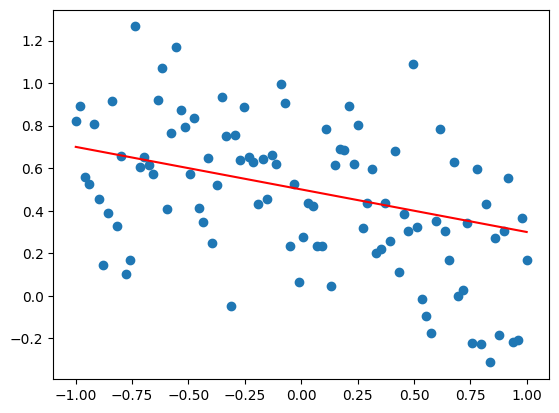

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

X = np.linspace(-1,1,n)
X.resize([n,1])
fX = -0.2*X + 0.5

eps = np.random.multivariate_normal(mean = [0], cov = [[0.1]], size = [n])

Y = fX + eps 

plt.scatter(X,Y)
plt.plot(X, fX, 'red')

83.15276791454966
61.82665688378721
47.12434786838011
36.91283406977957
29.75621096207911
24.686518344717616
21.050084574578275
18.404474909825854
16.449359225192005
14.980117934297425
13.856692828797616
12.98266077977694
12.291164250249553
11.735442304574493
11.282449494369335
10.908548412120581
10.596595751076554
10.333965613954508
10.111203905612825
9.921108271737516
9.758095520640566
9.617763720524616
9.496586525887285
9.391697663518027
9.300737190950997
9.221740333394772
9.153055887076093
9.093285338361628
9.041236653170934
8.995888585431787
8.956362635347563
8.921900658419105
8.89184671896003
8.865632187545762
8.84276336109326
8.822811077857434
8.805401934994054
8.790210811969978
8.776954471482487
8.765386059123948
8.75529035952345
8.74647969401171
8.738790365654484
8.732079573615831
8.726222731512683
8.721111134592256
8.716649928826996
8.712756341823248
8.709358141100441
8.706392290054136
8.703803775943793
8.70154458767876
8.699572824116062
8.697851916113063
8.696349947759996
8.

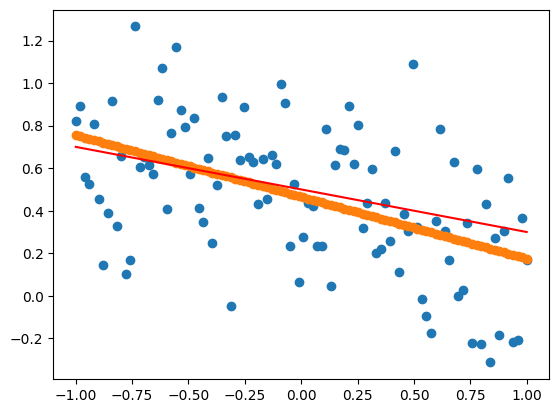

In [27]:
NN = network()
NN.add_layer(1,1,identity)
NN.fit(X,Y,10000, 1e-5) # fX étant un réseau particulier, on devrait pouvoir fitter (quasi) parfaitement
hatY = np.copy(Y)
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')
plt.show()

2059.9954381836033
983.0934748609003
523.5192901647328
310.34667924399974
202.687429275017
142.97577269971097
106.55503297464661
82.400865426283
65.32432760918401
52.71421731801441
43.14348173164526
35.75890263773439
30.005741958647196
25.4982114150112
21.95488603001631
19.16398930185574
16.963071828181377
15.226080332040015
13.854531024020643
12.771163233648892
11.915213771703467
11.238819045864384
10.704238083314923
10.281691222789622
9.947669356003965
9.683607036364865
9.474839002592926
9.309778456581714
9.179269356098407
9.07607552434736
8.994477472898806
8.929954105620576
8.878931357777072
8.83858364659121
8.806677006919905
8.781445140557269
8.761491460242269
8.745711668315261
8.733232559691876
8.723363645463328
8.71555890872992
8.709386568833663
8.704505175883378
8.700644709468863
8.697591633505494
8.69517707881857
8.693267498648847
8.69175727942901
8.690562897590663
8.689618298851727
8.688871244169876
8.688280420095932
8.687813153594549
8.6874436048698
8.687151338196113
8.686920

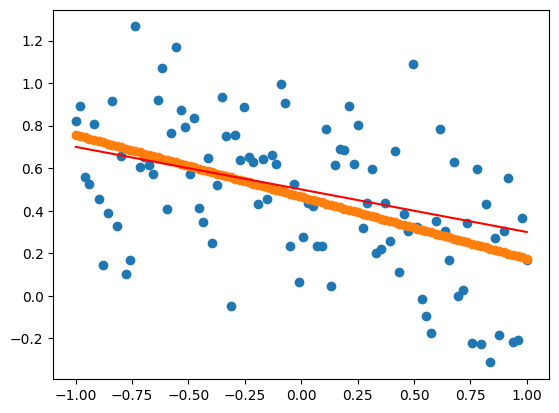

In [44]:
#Testons un réseau à deux couches

NN = network()
NN.add_layer(1,10,identity)
NN.add_layer(10,1,identity)
NN.fit(X,Y,10000,1e-6) 
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')

358.95415387942137
8.629086977661913
8.611855815647235
8.596904923295684
8.582471660585506
8.568462008606511
8.554805073143093
8.541442355517948
8.52832650132115
8.515420330660787
[[0.72183076]
 [0.7181258 ]
 [0.71438052]
 [0.71059439]
 [0.70676689]
 [0.70289751]
 [0.69898573]
 [0.69503107]
 [0.69103304]
 [0.68699114]
 [0.68290491]
 [0.67877389]
 [0.67459763]
 [0.67037569]
 [0.66610765]
 [0.6617931 ]
 [0.65743163]
 [0.65302287]
 [0.64856645]
 [0.64406202]
 [0.63950925]
 [0.63490781]
 [0.63025742]
 [0.62555779]
 [0.62080866]
 [0.61600981]
 [0.61116101]
 [0.60626207]
 [0.60131283]
 [0.59631313]
 [0.59126286]
 [0.58616192]
 [0.58101024]
 [0.57580778]
 [0.57055454]
 [0.56525051]
 [0.55989575]
 [0.55449034]
 [0.54903436]
 [0.54352797]
 [0.53797132]
 [0.53236462]
 [0.52670809]
 [0.52100201]
 [0.51524667]
 [0.50944242]
 [0.5035896 ]
 [0.49768864]
 [0.49173997]
 [0.48574407]
 [0.47970144]
 [0.47361263]
 [0.46747824]
 [0.46129888]
 [0.45507521]
 [0.44880792]
 [0.44249774]
 [0.43614545]
 [0.4297

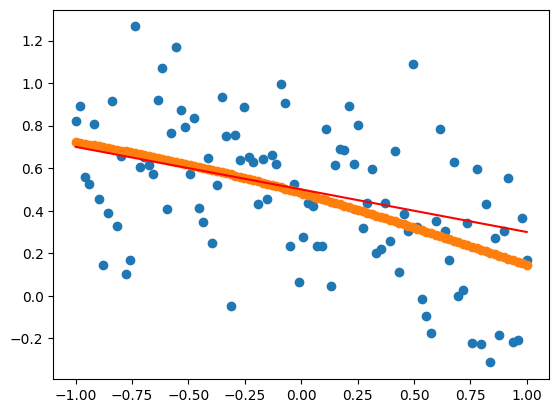

In [49]:
#Testons la fonction d'activation sigmoïde

NN = network()
NN.add_layer(1,10,sigmoid)
NN.add_layer(10,1,identity)
NN.fit(X,Y,1000,1e-3) 
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
print(hatY)
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')

### Test : régression polynomiale

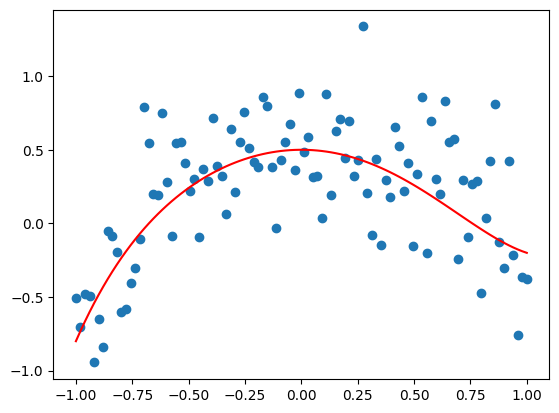

In [50]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

X = np.linspace(-1,1,n)
X.resize([n,1])
fX = 0.3*X**5 - X**2 + 0.5

eps = np.random.multivariate_normal(mean = [0], cov = [[0.1]], size = [n])

Y = fX + eps 

plt.scatter(X,Y)
plt.plot(X, fX, 'red')

In [1]:
NN = network()
NN.add_layer(1,100,sigmoid)
NN.add_layer(100,100,sigmoid)
NN.add_layer(100,100,sigmoid)
NN.add_layer(100,1,sigmoid)

NN.fit(X,Y, 1000, 1e-3)

n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')

NameError: name 'network' is not defined